In [1]:
import re
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# train_data = pd.read_csv('train_data (1).csv')
# test_data = pd.read_csv('test_data (1).csv')

train_data = pd.read_csv('./train_data_M.csv')
# train_data = pd.read_csv('./train_data.csv')




In [2]:
!pip install nltk

In [3]:
!pip install wordcloud

In [4]:
documents = train_data['sample']
documents

,sample
0,"“$NE$ cum am spus, nu este un sfârşit de drum ..."
1,Liberal - democratul $NE$ $NE$ renunţă la mand...
2,Cel mai puternic computer din lume nu e în $NE...
3,Federaţia slovenă de fotbal ( $NE$ ) a anunţat...
4,În cadrul unei întâlnirii a $NE$ de $NE$ din $...
...,...
21714,O echipă de genişti a poliţiei braziliene a de...
21715,"Pana sa ajunga la acest rezultat, cercetatorii..."
21716,"$NE$ $NE$ în vârstă de 6 ani şi 11 luni, din c..."
21717,Mai mulți demnitari de stat și politicieni au ...


In [2]:
romana_df = train_data[train_data['dialect'] == 1].copy()
moldoveneasca_df = train_data[train_data['dialect'] == 2].copy()

#romana_df
moldoveneasca_df

,datapointID,sample,dialect,category
0,48482,"“$NE$ cum am spus, nu este un sfârşit de drum ...",2,3
4,49404,În cadrul unei întâlnirii a $NE$ de $NE$ din $...,2,6
5,39154,El a făcut referire la un proiect privind modi...,2,3
9,32005,"Ținta de deficit, în pericol, chiar și după mo...",2,2
11,30334,La o distanţă de peste 6 . 000 de kilometri fa...,2,4
...,...,...,...,...
21708,23292,Vremea se va afla într - un proces de răcire p...,2,6
21710,14747,Ea a spus că apreciază suportul pe care i - l ...,2,3
21714,24709,O echipă de genişti a poliţiei braziliene a de...,2,5
21715,17783,"Pana sa ajunga la acest rezultat, cercetatorii...",2,4


In [2]:
import re
import string
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords

def remove_diacritics(text):
    return text.replace('ț', 't').replace('ţ', 't').replace('ș', 's').replace('ş', 's').replace('ă', 'a').replace('â', 'a').replace('î', 'i')

def remove_stopwords_from_text(text):
    stopwords_ro = stopwords.words('romanian')
    stopwords_ro = [remove_diacritics(s) for s in stopwords_ro]
    words = text.split()
    words = [word for word in words if remove_diacritics(word.lower()) not in stopwords_ro]
    return " ".join(words)

def remove_ne_from_text(text):
  text = text.replace("$NE$", "")
  return text

def clean(text):
  text = remove_stopwords_from_text(text)
  text = remove_ne_from_text(text)
  text = re.sub(r"[0-9]", "", text)
  punct = ['"', "„", '-', "%", "+", ")", "(", "“", "-"]
  punct.extend(string.punctuation)
  text = "".join([word for word in text if word not in punct])
  return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
documents_ro = romana_df['sample'].apply(clean)
documents_mld = moldoveneasca_df['sample'].apply(clean)

documents_ro

,sample
1,Liberal democratul renunţă mandatul deputat...
2,puternic computer lume Chinezii depăşit a...
3,Federaţia slovenă fotbal anunţat fostul con...
6,veți afla lucruri publicitate spunem Cafeaua...
7,femei antreprenoare succes instruite domeni...
...,...
21711,Tânărul interpret Ştefănel elev clasa ca...
21712,învinsă deplasare cadrul primei manşe tu...
21713,Potrivit noului primar mun ostatici locui...
21717,demnitari stat politicieni ținut transmită mes...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


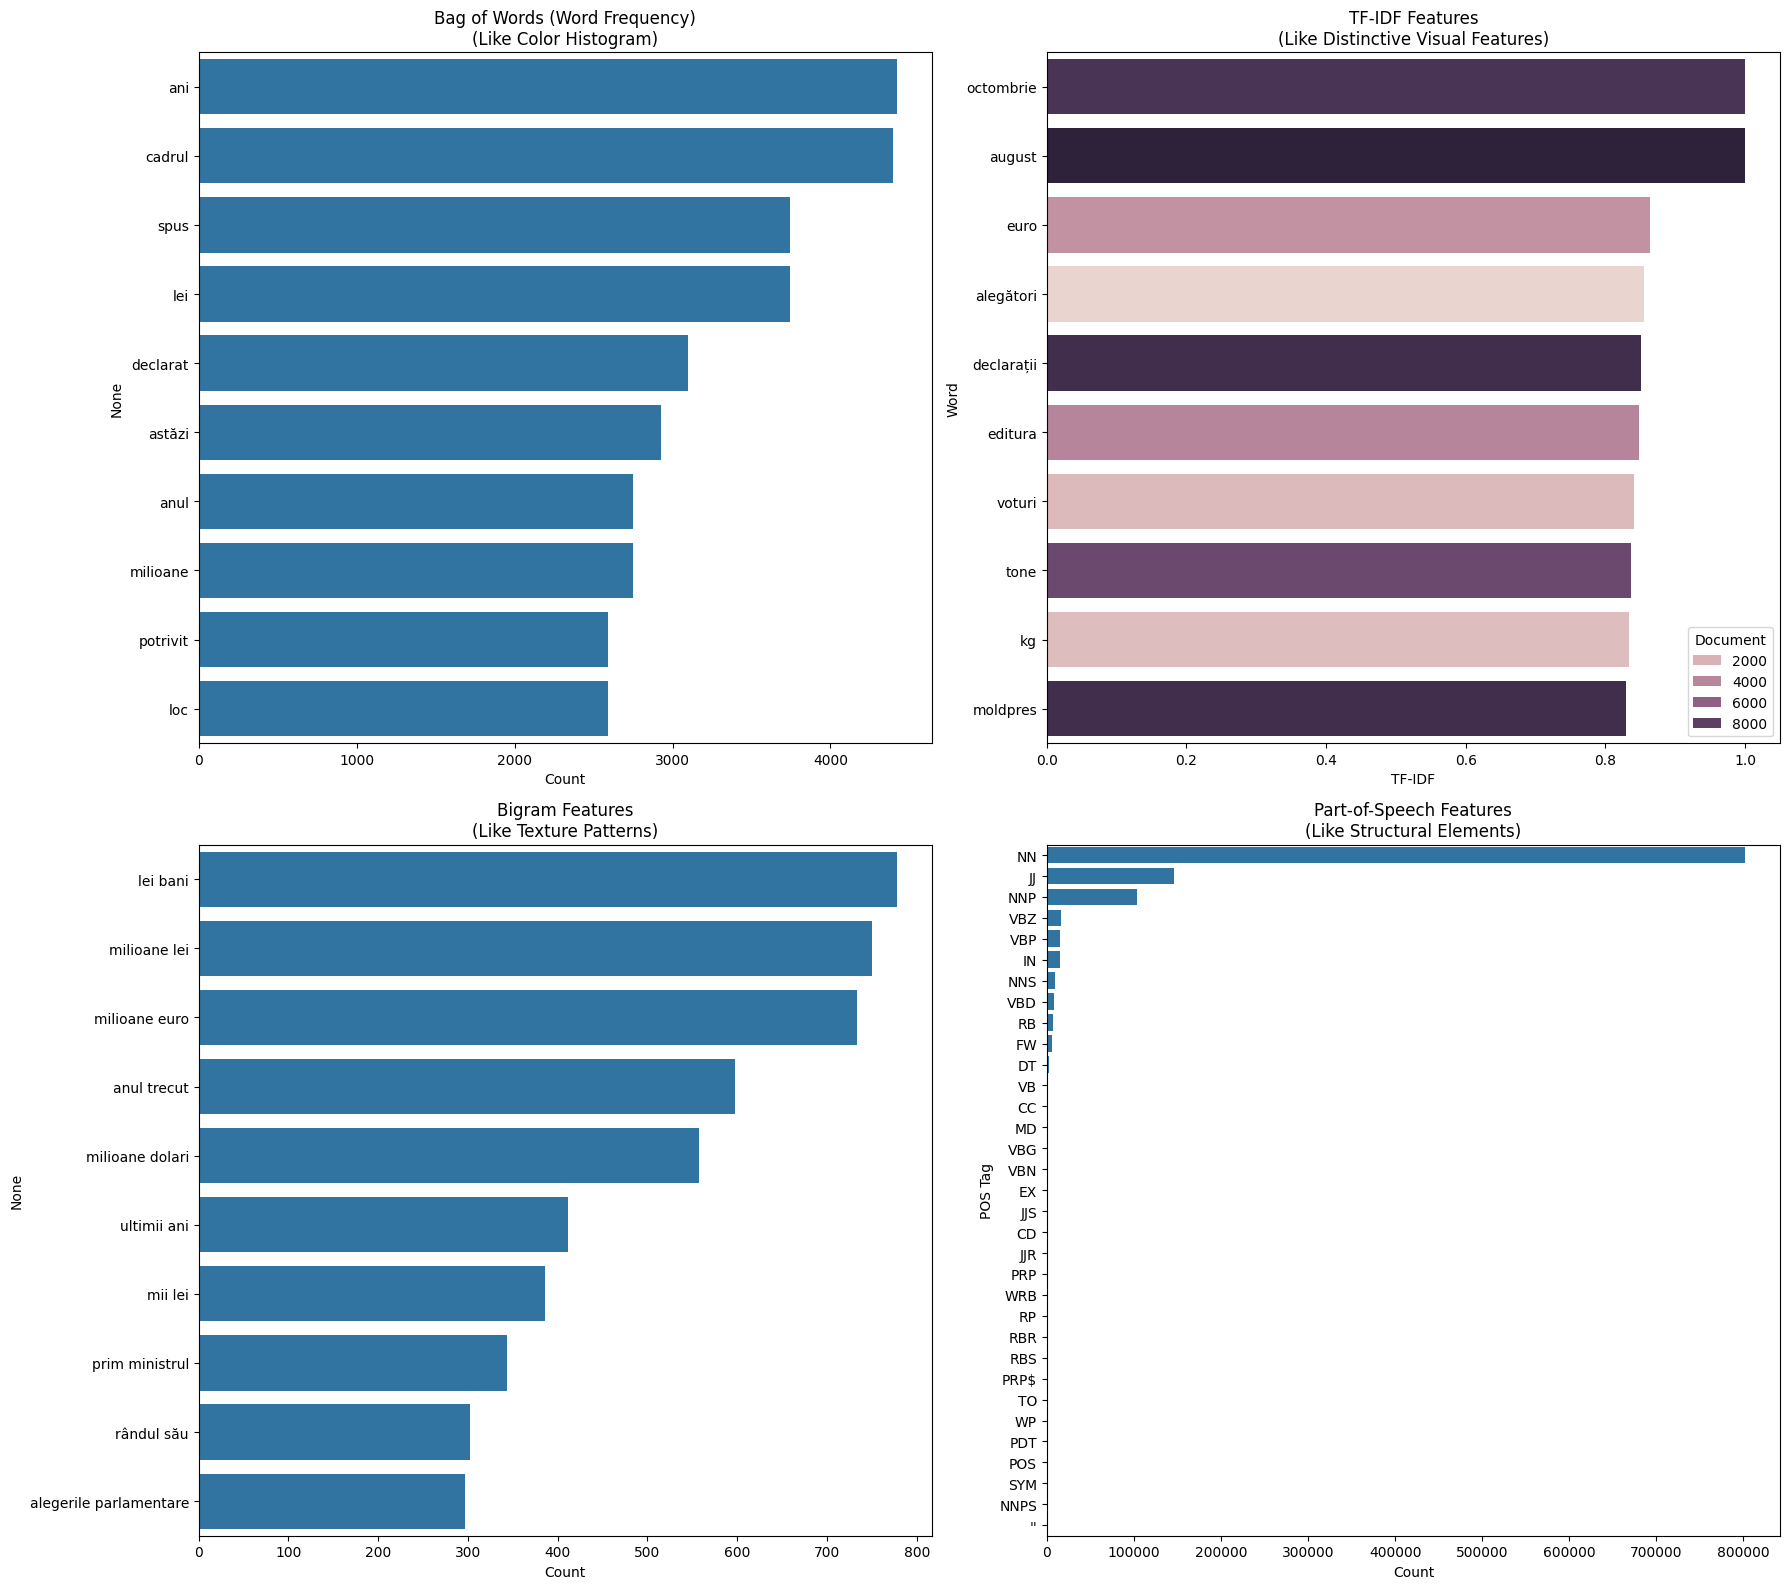

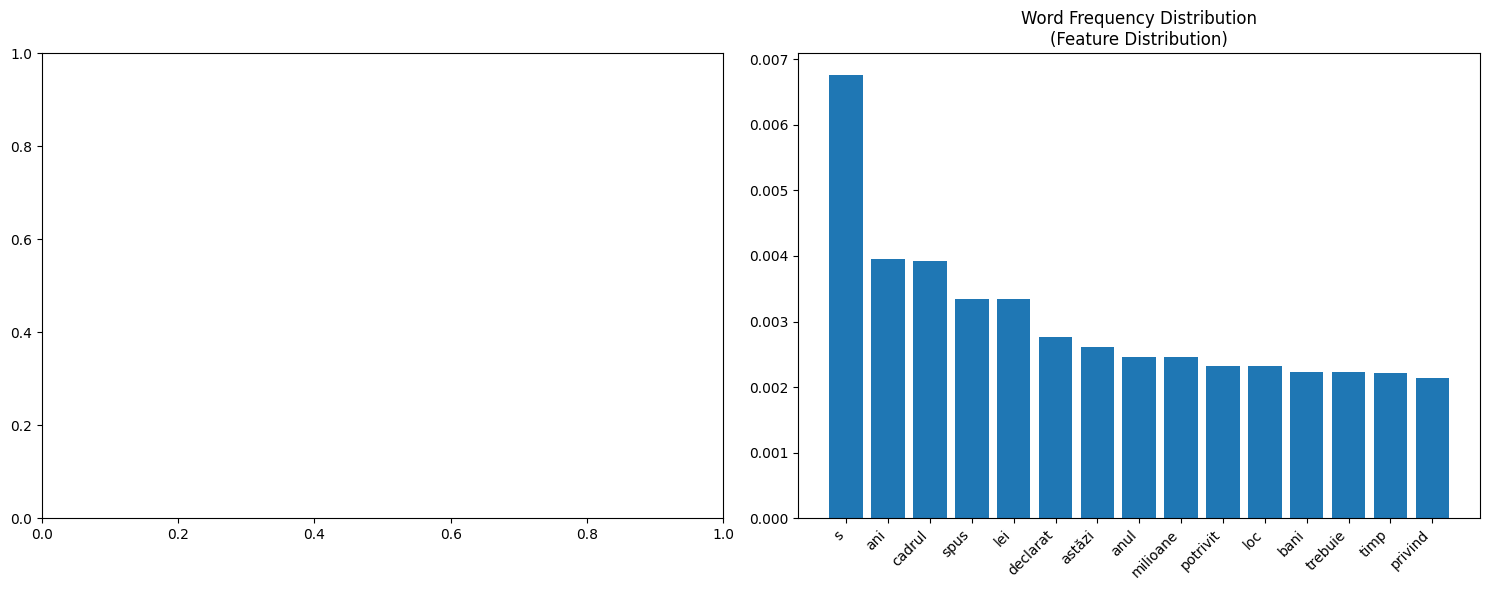

In [5]:
# pentru romana

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import ngrams, pos_tag
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import string

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger_eng')

# 1. Bag of Words (word frequency)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents_ro)
words = vectorizer.get_feature_names_out()
word_counts = X.toarray()

# 2. TF-IDF (term importance)
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(documents_ro)
tfidf_words = tfidf_vectorizer.get_feature_names_out()
tfidf_values = X_tfidf.toarray()


# 3. N-grams (word combinations)
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2))
X_bigrams = bigram_vectorizer.fit_transform(documents_ro)
bigrams = bigram_vectorizer.get_feature_names_out()
bigram_counts = X_bigrams.toarray()

# 4. Part-of-Speech tagging (grammatical features)
pos_features = []
for doc in documents_ro:
    tokens = word_tokenize(doc)
    pos_tags = pos_tag(tokens)
    pos_features.append(pos_tags)

# Create visualizations
plt.figure(figsize=(18, 16))

# Word frequency visualization
plt.subplot(2, 2, 1)
df_bow = pd.DataFrame(word_counts, columns=words)
top_words = df_bow.sum().sort_values(ascending=False)[:10]
sns.barplot(x=top_words.values, y=top_words.index)
plt.title('Bag of Words (Word Frequency)\n(Like Color Histogram)')
plt.xlabel('Count')

# TF-IDF visualization
plt.subplot(2, 2, 2)
df_tfidf = pd.DataFrame(tfidf_values, columns=tfidf_words)
# Get top TF-IDF words for each document
top_tfidf_words = []

for i, doc in enumerate(documents_ro):
    top_indices = tfidf_values[i].argsort()[-1:][::-1]
    for idx in top_indices:
      top_tfidf_words.append((tfidf_words[idx], tfidf_values[i][idx], i))

top_tfidf_words.sort(key= lambda x: x[1], reverse=True)


df_top_tfidf = pd.DataFrame(top_tfidf_words[:10], columns=['Word', 'TF-IDF', 'Document'])
sns.barplot(x='TF-IDF', y='Word', hue='Document', data=df_top_tfidf)
plt.title('TF-IDF Features\n(Like Distinctive Visual Features)')
plt.legend(title='Document', loc='lower right')

# N-gram visualization
plt.subplot(2, 2, 3)
df_bigrams = pd.DataFrame(bigram_counts, columns=bigrams)
top_bigrams = df_bigrams.sum().sort_values(ascending=False)[:10]
sns.barplot(x=top_bigrams.values, y=top_bigrams.index)
plt.title('Bigram Features\n(Like Texture Patterns)')
plt.xlabel('Count')

# POS tag visualization
plt.subplot(2, 2, 4)
pos_counts = {}
for doc_tags in pos_features:
    for _, tag in doc_tags:
        pos_counts[tag] = pos_counts.get(tag, 0) + 1

pos_df = pd.DataFrame(list(pos_counts.items()), columns=['POS Tag', 'Count'])
pos_df = pos_df.sort_values('Count', ascending=False)
sns.barplot(x='Count', y='POS Tag', data=pos_df)
plt.title('Part-of-Speech Features\n(Like Structural Elements)')

plt.tight_layout()
plt.show()

# Show parallel between feature distributions
plt.figure(figsize=(15, 6))

# Color histogram (normalized)
plt.subplot(1, 2, 1)

# Word frequency distribution (normalized)
plt.subplot(1, 2, 2)
# Combine all documents
all_words = []
for doc in documents_ro:
    all_words.extend(word_tokenize(doc.lower()))

all_words = [word for word in all_words if word.isalpha()]
word_freq = FreqDist(all_words)
word_freq_df = pd.DataFrame({'word': list(word_freq.keys()), 'frequency': list(word_freq.values())})
word_freq_df = word_freq_df.sort_values('frequency', ascending=False)

# Normalize
total = word_freq_df['frequency'].sum()
word_freq_df['normalized'] = word_freq_df['frequency'] / total

plt.bar(range(len(word_freq_df[:15])), word_freq_df['normalized'][:15], tick_label=word_freq_df['word'][:15])
plt.xticks(rotation=45, ha='right')
plt.title('Word Frequency Distribution\n(Feature Distribution)')

plt.tight_layout()
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_

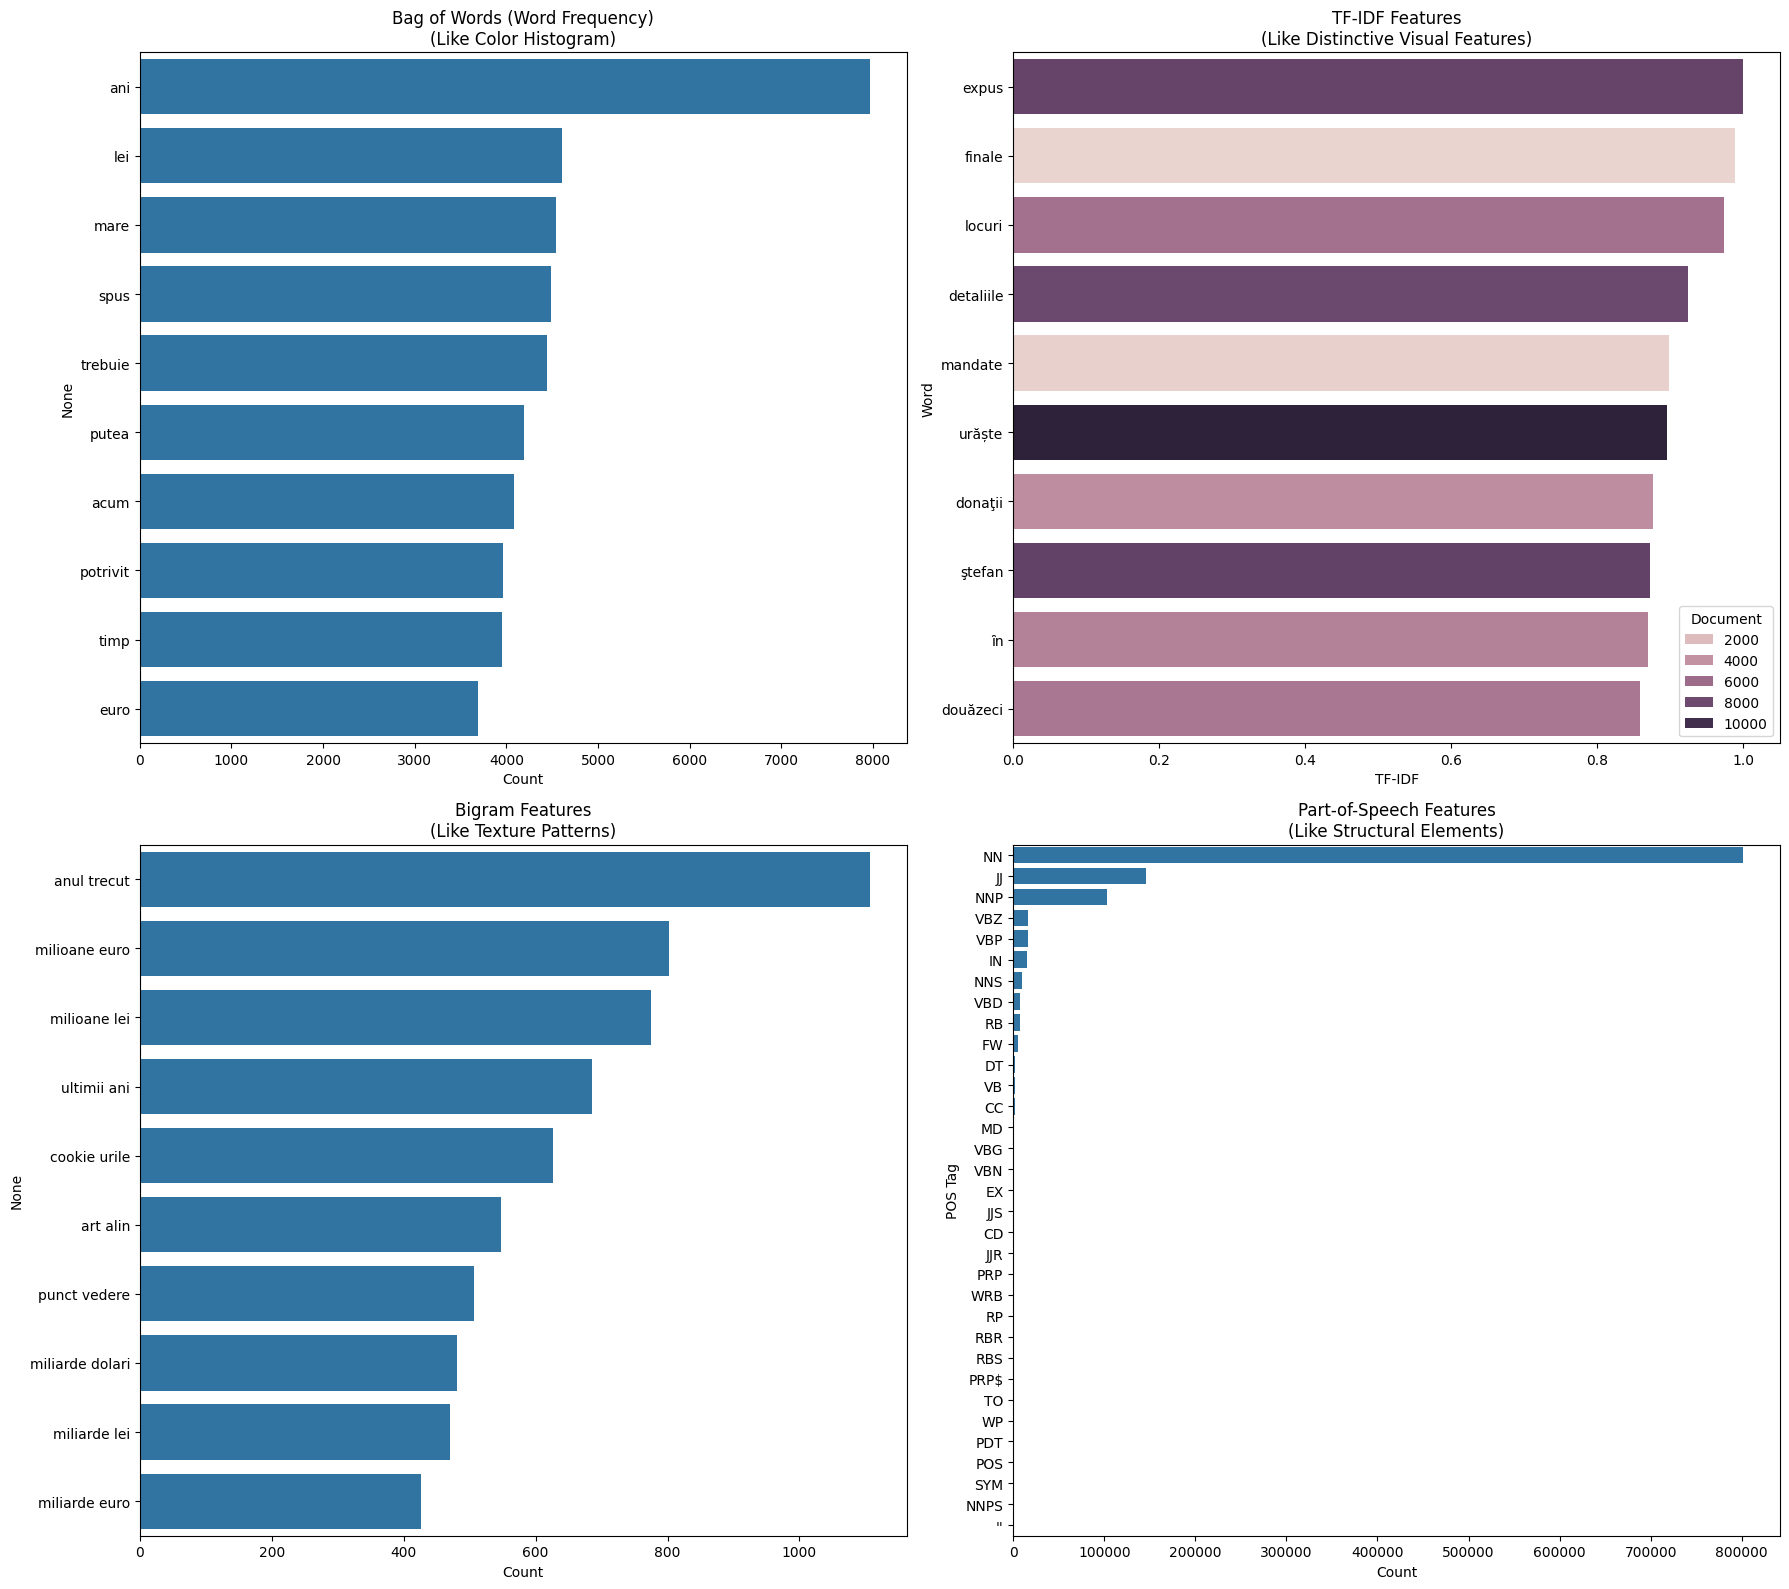

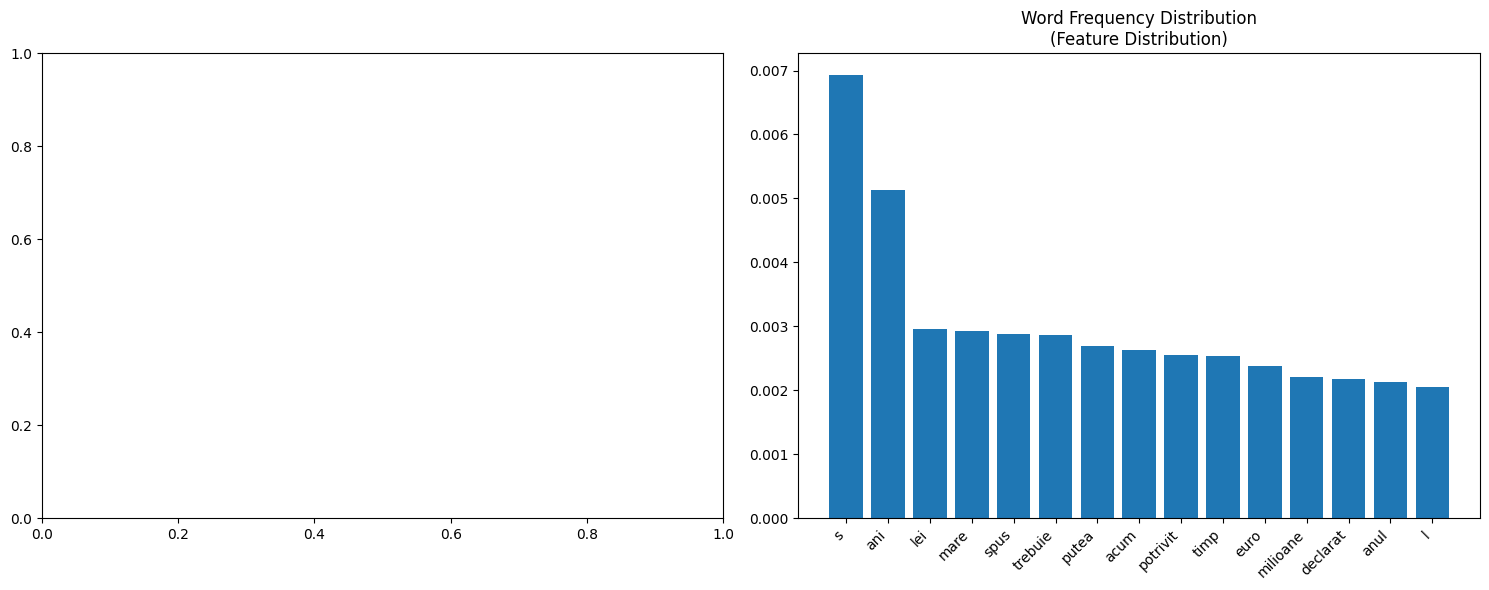

In [5]:
# pentru moldoveneasca

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import ngrams, pos_tag
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# Download necessary NLTK data
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger_eng')

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import ngrams, pos_tag
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import string

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger_eng')

# 1. Bag of Words (word frequency)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents_mld)
words = vectorizer.get_feature_names_out()
word_counts = X.toarray()

# 2. TF-IDF (term importance)
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(documents_mld)
tfidf_words = tfidf_vectorizer.get_feature_names_out()
tfidf_values = X_tfidf.toarray()


# 3. N-grams (word combinations)
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2))
X_bigrams = bigram_vectorizer.fit_transform(documents_mld)
bigrams = bigram_vectorizer.get_feature_names_out()
bigram_counts = X_bigrams.toarray()

# 4. Part-of-Speech tagging (grammatical features)
pos_features = []
for doc in documents_ro:
    tokens = word_tokenize(doc)
    pos_tags = pos_tag(tokens)
    pos_features.append(pos_tags)

# Create visualizations
plt.figure(figsize=(18, 16))

# Word frequency visualization
plt.subplot(2, 2, 1)
df_bow = pd.DataFrame(word_counts, columns=words)
top_words = df_bow.sum().sort_values(ascending=False)[:10]
sns.barplot(x=top_words.values, y=top_words.index)
plt.title('Bag of Words (Word Frequency)\n(Like Color Histogram)')
plt.xlabel('Count')

# TF-IDF visualization
plt.subplot(2, 2, 2)
df_tfidf = pd.DataFrame(tfidf_values, columns=tfidf_words)
top_tfidf_words = []
# Get top TF-IDF words for each document
for i, doc in enumerate(documents_mld):
    top_indices = tfidf_values[i].argsort()[-1:][::-1]
    for idx in top_indices:
      top_tfidf_words.append((tfidf_words[idx], tfidf_values[i][idx], i))

top_tfidf_words.sort(key= lambda x: x[1], reverse=True)

df_top_tfidf = pd.DataFrame(top_tfidf_words[:10], columns=['Word', 'TF-IDF', 'Document'])
sns.barplot(x='TF-IDF', y='Word', hue='Document', data=df_top_tfidf)
plt.title('TF-IDF Features\n(Like Distinctive Visual Features)')
plt.legend(title='Document', loc='lower right')

# N-gram visualization
plt.subplot(2, 2, 3)
df_bigrams = pd.DataFrame(bigram_counts, columns=bigrams)
top_bigrams = df_bigrams.sum().sort_values(ascending=False)[:10]
sns.barplot(x=top_bigrams.values, y=top_bigrams.index)
plt.title('Bigram Features\n(Like Texture Patterns)')
plt.xlabel('Count')

# POS tag visualization
plt.subplot(2, 2, 4)
pos_counts = {}
for doc_tags in pos_features:
    for _, tag in doc_tags:
        pos_counts[tag] = pos_counts.get(tag, 0) + 1

pos_df = pd.DataFrame(list(pos_counts.items()), columns=['POS Tag', 'Count'])
pos_df = pos_df.sort_values('Count', ascending=False)
sns.barplot(x='Count', y='POS Tag', data=pos_df)
plt.title('Part-of-Speech Features\n(Like Structural Elements)')

plt.tight_layout()
plt.show()

# Show parallel between feature distributions
plt.figure(figsize=(15, 6))

# Color histogram (normalized)
plt.subplot(1, 2, 1)

# Word frequency distribution (normalized)
plt.subplot(1, 2, 2)
# Combine all documents
all_words = []
for doc in documents_mld:
    all_words.extend(word_tokenize(doc.lower()))

all_words = [word for word in all_words if word.isalpha()]
word_freq = FreqDist(all_words)
word_freq_df = pd.DataFrame({'word': list(word_freq.keys()), 'frequency': list(word_freq.values())})
word_freq_df = word_freq_df.sort_values('frequency', ascending=False)

# Normalize
total = word_freq_df['frequency'].sum()
word_freq_df['normalized'] = word_freq_df['frequency'] / total

plt.bar(range(len(word_freq_df[:15])), word_freq_df['normalized'][:15], tick_label=word_freq_df['word'][:15])
plt.xticks(rotation=45, ha='right')
plt.title('Word Frequency Distribution\n(Feature Distribution)')

plt.tight_layout()
plt.show()

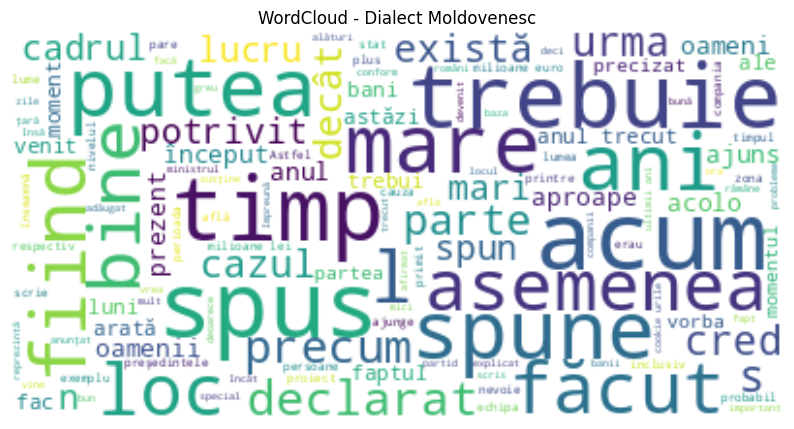

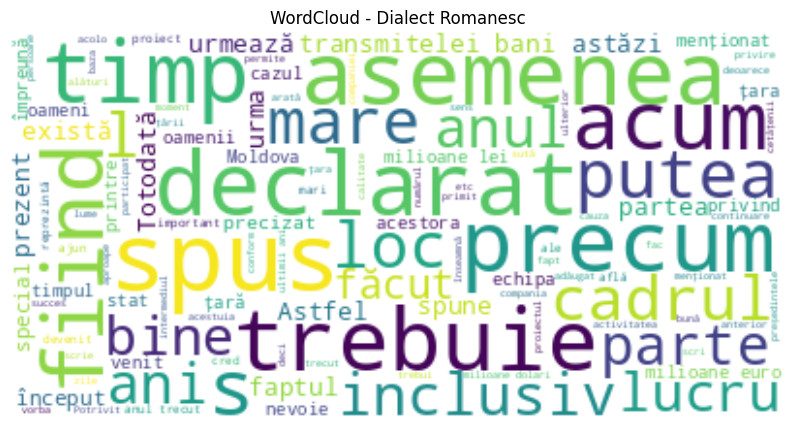

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenăm toate textele într-un singur șir
text_mld = ' '.join(documents_mld)

# Generăm WordCloud
wordcloud = WordCloud(max_font_size=50, max_words=1000, background_color="white").generate(text_mld)

# Afișăm imaginea
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Dialect Moldovenesc')
plt.show()




# Concatenăm toate textele într-un singur șir
text_ro = ' '.join(documents_ro)

# Generăm WordCloud
wordcloud = WordCloud(max_font_size=50, max_words=1000, background_color="white").generate(text_ro)

# Afișăm imaginea
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Dialect Romanesc')
plt.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


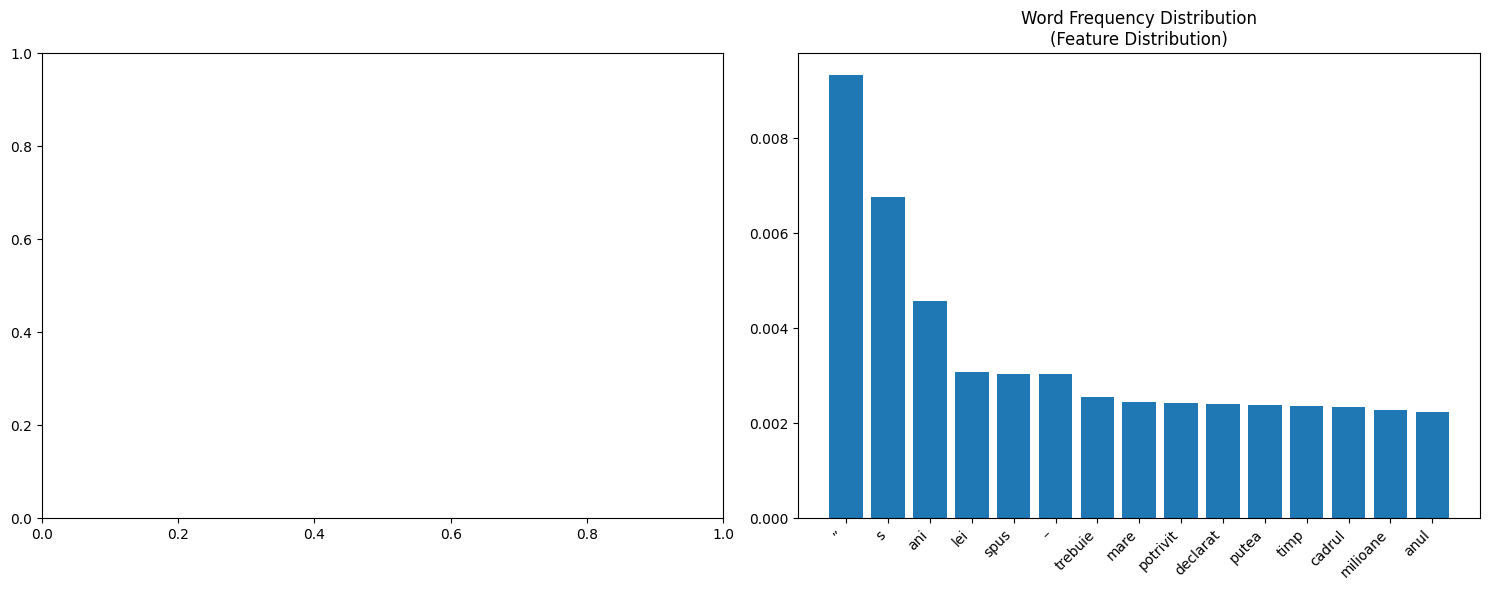

In [3]:
# pentru tot setul de date

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import ngrams, pos_tag
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

documents = train_data['sample'].apply(clean)

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger_eng')

# 1. Bag of Words (word frequency)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)
words = vectorizer.get_feature_names_out()
word_counts = X.toarray()

# 2. TF-IDF (term importance)
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(documents)
tfidf_words = tfidf_vectorizer.get_feature_names_out()
tfidf_values = X_tfidf.toarray()

# 3. N-grams (word combinations)
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2))
X_bigrams = bigram_vectorizer.fit_transform(documents)
bigrams = bigram_vectorizer.get_feature_names_out()
bigram_counts = X_bigrams.toarray()

# 4. Part-of-Speech tagging (grammatical features)
pos_features = []
for doc in documents:
    tokens = word_tokenize(doc)
    pos_tags = pos_tag(tokens)
    pos_features.append(pos_tags)

# Create visualizations
plt.figure(figsize=(18, 16))

# Word frequency visualization
plt.subplot(2, 2, 1)
df_bow = pd.DataFrame(word_counts, columns=words)
top_words = df_bow.sum().sort_values(ascending=False)[:10]
sns.barplot(x=top_words.values, y=top_words.index)
plt.title('Bag of Words (Word Frequency)\n(Like Color Histogram)')
plt.xlabel('Count')

# TF-IDF visualization
plt.subplot(2, 2, 2)
df_tfidf = pd.DataFrame(tfidf_values, columns=tfidf_words)
# Get top TF-IDF words for each document
top_tfidf_words = []
for i, doc in enumerate(documents):
    top_indices = tfidf_values[i].argsort()[-1:][::-1]
    for idx in top_indices:
      top_tfidf_words.append((tfidf_words[idx], tfidf_values[i][idx], i))

top_tfidf_words.sort(key= lambda x: x[1], reverse=True)

df_top_tfidf = pd.DataFrame(top_tfidf_words[:10], columns=['Word', 'TF-IDF', 'Document'])
sns.barplot(x='TF-IDF', y='Word', hue='Document', data=df_top_tfidf)
plt.title('TF-IDF Features\n(Like Distinctive Visual Features)')
plt.legend(title='Document', loc='lower right')

# N-gram visualization
plt.subplot(2, 2, 3)
df_bigrams = pd.DataFrame(bigram_counts, columns=bigrams)
top_bigrams = df_bigrams.sum().sort_values(ascending=False)[:10]
sns.barplot(x=top_bigrams.values, y=top_bigrams.index)
plt.title('Bigram Features\n(Like Texture Patterns)')
plt.xlabel('Count')

# POS tag visualization
plt.subplot(2, 2, 4)
pos_counts = {}
for doc_tags in pos_features:
    for _, tag in doc_tags:
        pos_counts[tag] = pos_counts.get(tag, 0) + 1

pos_df = pd.DataFrame(list(pos_counts.items()), columns=['POS Tag', 'Count'])
pos_df = pos_df.sort_values('Count', ascending=False)
sns.barplot(x='Count', y='POS Tag', data=pos_df)
plt.title('Part-of-Speech Features\n(Like Structural Elements)')

plt.tight_layout()
plt.show()

# Show parallel between feature distributions
plt.figure(figsize=(15, 6))

# Color histogram (normalized)
plt.subplot(1, 2, 1)
'''
color_hist_normalized = []
for hist in color_hists:
    normalized = hist / hist.sum()
    color_hist_normalized.append(normalized)

plt.plot(color_hist_normalized[0], 'r', alpha=0.7)
plt.plot(color_hist_normalized[1], 'g', alpha=0.7)
plt.plot(color_hist_normalized[2], 'b', alpha=0.7)
plt.title('Image Color Distribution\n(Feature Distribution)')
plt.xlim([0, 256])
'''
# Word frequency distribution (normalized)
plt.subplot(1, 2, 2)
# Combine all documents
all_words = []
for doc in documents:
    all_words.extend(word_tokenize(doc.lower()))

word_freq = FreqDist(all_words)
word_freq_df = pd.DataFrame({'word': list(word_freq.keys()), 'frequency': list(word_freq.values())})
word_freq_df = word_freq_df.sort_values('frequency', ascending=False)

# Normalize
total = word_freq_df['frequency'].sum()
word_freq_df['normalized'] = word_freq_df['frequency'] / total

plt.bar(range(len(word_freq_df[:15])), word_freq_df['normalized'][:15], tick_label=word_freq_df['word'][:15])
plt.xticks(rotation=45, ha='right')
plt.title('Word Frequency Distribution\n(Feature Distribution)')

plt.tight_layout()
plt.show()